In [1]:
import tifffile
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plot

# 去除黑边

In [ ]:
input = tifffile.imread(
    "/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/Averaged shifted histograms 11.tif"
)

z_project = np.sum(input, 0)
x_sum = np.sum(z_project, axis=0)
y_sum = np.sum(z_project, axis=1)

up = 0
down = z_project.shape[0]
left = 0
right = z_project.shape[1]

up = min(np.where(y_sum != 0)[0]) - 10 if min(np.where(y_sum != 0)[0]) > 10 else 0
down = max(np.where(y_sum != 0)[0]) + 10 if max(np.where(
    y_sum != 0)[0]) < z_project.shape[0] - 10 else z_project.shape[0]
left = min(np.where(x_sum != 0)[0]) - 10 if min(np.where(x_sum != 0)[0]) > 10 else 0
right = max(np.where(x_sum != 0)[0]) + 10 if min(np.where(
    x_sum != 0)[0]) < z_project.shape[1] - 10 else z_project.shape[1]


output = input[:, up:down, left:right]

tifffile.imsave(
    "/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/Averaged shifted histograms 11.tif",
    output)

print('运行完成')

# 滑动截取ROI区域

运行完成


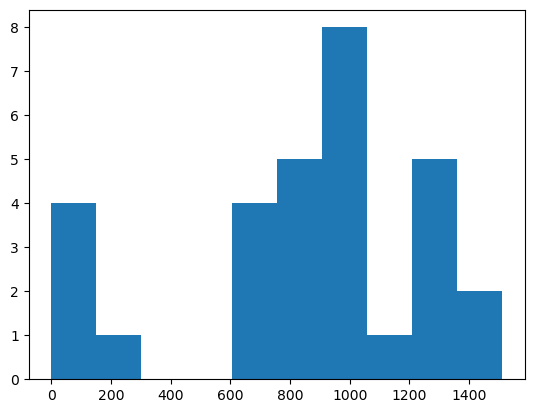

In [31]:
name = 11

input_high = tifffile.imread(
    f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/high/Averaged shifted histograms {name}.tif"
)

input_low = tifffile.imread(
    f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/PreImage/low/Averaged shifted histograms {name}.tif"
)

data_dict = {}
point_list = []
size = 128
step = 32
_, h, w = input_high.shape
for x in range(0, w - size, step):
    for y in range(0, h - size, step):
        crop_data_high = input_high[:, y:y + size, x:x + size]
        crop_data_high = cv.resize(crop_data_high.transpose(1, 2, 0),
                              (64, 64)).transpose(2, 0, 1)

        crop_data_low = input_low[:, y:y + size, x:x + size]
        crop_data_low = cv.resize(crop_data_low.transpose(1, 2, 0),
                              (64, 64)).transpose(2, 0, 1)

        z_project = np.sum(crop_data_high, 0)
        z_project[z_project != 0] = 1

        count_point = np.sum(z_project)
        point_list.append(count_point)

        data_dict[f"{x}:{y}:{count_point}"] = [crop_data_high, crop_data_low]

plot.hist(point_list)

print('运行完成')

In [32]:
i = 1
for k, data in data_dict.items():
    if float(k.split(":")[-1]) > 450:
        data_high, data_low = data
        data_high_90 = np.rot90(data_high.transpose(1, 2,
                                                    0)).transpose(2, 0, 1)
        data_high_180 = np.rot90(data_high_90.transpose(1, 2,
                                                        0)).transpose(2, 0, 1)
        data_high_270 = np.rot90(data_high_180.transpose(1, 2, 0)).transpose(
            2, 0, 1)

        data_low_90 = np.rot90(data_low.transpose(1, 2, 0)).transpose(2, 0, 1)
        data_low_180 = np.rot90(data_low_90.transpose(1, 2,
                                                      0)).transpose(2, 0, 1)
        data_low_270 = np.rot90(data_low_180.transpose(1, 2,
                                                       0)).transpose(2, 0, 1)

        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i}.tif",
            data_high)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+1}.tif",
            data_high_90)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+2}.tif",
            data_high_180)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/labels/{i+3}.tif",
            data_high_270)

        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i}.tif",
            data_low)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+1}.tif",
            data_low_90)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+2}.tif",
            data_low_180)
        tifffile.imsave(
            f"/Users/WangHao/Desktop/Paper ImT UNet/data_0913/datasets/inputs/{i+3}.tif",
            data_low_270)

        i += 4
        
print('运行完成')

运行完成
